In [149]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Ejercicio 4

def columnas (A,n):
    vector=np.array([])
    if n<=np.shape(A)[1]:
        for i in range(0,np.shape(A)[0]):
            vector=np.append(vector,A[i][n])
    else:
        "La columna indicada sobrepasa el índice de columnas de la matriz"
    return vector


                   
def multiplicador_matrices (A,B):
    dim_A=np.shape(A)
    dim_B=np.shape(B)
    matriz_multi=np.zeros(shape= (dim_A[0],dim_B[1]))
    if dim_A[1]==dim_B[0]:
        for i in range(0,np.shape(A)[0]) :
            for j in range(0,np.shape(B)[1]):
                matriz_multi[i][j]=np.dot(A[i],columnas(B,j))
    else:
        return ("Las matrices no se pueden multiplicar, maestro")

    return matriz_multi





In [150]:
#Ejercicio 11

#Tenemos la matriz
A=np.array([[1,2,-1],[1,0,1],[4,-4,5]])
A_inv=np.linalg.inv(A)
random=np.random.rand(3)


def hallar_vector_propio (A,vector,i):
    normal_0=vector/np.linalg.norm(vector)
    for j in range (i):
        eigenvector=np.dot(A,normal_0)
        eigenvector_normal=eigenvector/np.linalg.norm(eigenvector)
        normal_0=eigenvector_normal
    return normal_0

vector=hallar_vector_propio (A_inv,random,20)
vector_t=np.transpose(vector)
eigenvalue=np.dot(vector,vector_t)
print("El valor propio menor es:" , eigenvalue, " y su vector es: " ,vector)



El valor propio menor es: 1.0  y su vector es:  [ 0.40825012 -0.40823918 -0.81650022]


In [151]:
#Ejercicio 12

#Definamos nuestro sistema
sistema1=np.array([lambda x,y: np.log((x**2)+(y**2)) - np.sin(x*y)-np.log(2)-np.log(np.pi),
     lambda x,y: np.exp(x-y)+np.cos(x*y)])
sistema2=np.array([lambda x,y,z: (6*x)-(2*np.cos(y*z))-1, 
                   lambda x,y,z: 9*y+np.sqrt((x**2)+np.sin(z)+1.06)+0.9, 
                   lambda x,y,z:(60*z)+3*np.exp(-x*y)+(10*np.pi)-3 ])
def GetF1(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1])
        
    return v


def GetJacobian1(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1]) - f[i](rb[0],rb[1])  )/(2*h)
            
    
    return J

def NewtonRaphson1(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        
        
        it += 1
    
    
    return r,dvector

solucion_sistema_1=NewtonRaphson1(sistema1,np.array([2,2]))

x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

def GetJacobian2(F,r,h=1e-6):
    
    n = r.shape[0]
    
    J = sym.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if j==0:
                J[i,j] = sym.diff(F[i],x,1)
            else:
                J[i,j] = sym.diff(F[i],y,1)
    
    return J
print(GetJacobian2(sistema2,np.array([0,0,0])))
def NewtonRaphson2(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF2(G,rc)
        J = GetJacobian2(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        print(dvector)
        
        it += 1
    
    print(it)
    return r,dvector



TypeError: '<' not supported between instances of 'tuple' and 'int'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
1
2
3
4
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
1
2
3
4
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
5
1
2
3
4
5
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
1
2
3
4
5
6
1
2
3
4
5
6
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1
2

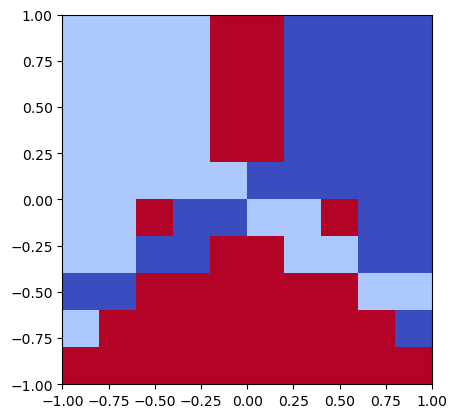

In [157]:
x=sym.Symbol('x', real=True)
y=sym.Symbol('y', real=True)
z=x+ sym.I*y

def funcion(z):
    f=z**3-1
    f=f.expand()
    return (sym.re(f), sym.im(f))

def Jacobiano (f):
    n=np.shape(f)[0]
    J=sym.zeros(n,n)
    for i in range(2):
        for j in range(2):
            if j==0:
                J[i,j] = sym.diff(f[i],x,1)
            else:
                J[i,j] = sym.diff(f[i],y,1)
    return J

f=funcion(z)
jacobiano=Jacobiano(f)
inversa_jacobiano=jacobiano.inv(method='LU')
f_num=sym.lambdify([x,y],f,'numpy')
jaco_num=sym.lambdify([x,y],jacobiano,'numpy')

def NewtonR (f,j,r,itmax=1000,error=1e-7):
    e = 1
    it = 0
    
    while e>error and it<itmax:
        fn=f(r[0],r[1])
        jn=j(r[0],r[1])
        ijn=np.linalg.inv(jn)
        rf=r-np.dot(ijn,fn)
        e=np.linalg.norm(r-rf)
        r=rf
        it+=1
       
    return r

sol1=NewtonR(f_num,jaco_num,np.array([0.005,0.0005]))
def fractal(Fn,Jn,N):
    x=np.linspace(-1,1,N)
    y=np.linspace(-1,1,N)
    Fractal = np.zeros((N,N), np.int64)
    z1=NewtonR(f_num,jaco_num, np.array([0.5,0.5])).round(3)
    z2=NewtonR(f_num,jaco_num, np.array([-0.5,-0.5])).round(3)
    z3=NewtonR(f_num,jaco_num, np.array([0.005,0.0005])).round(3)
    for i in range(N):
        for j in range(N):
            entrada=NewtonR(f_num,jaco_num, [x[i],y[j]])
            if entrada[1].round(3)==z1[1]:
                Fractal[i][j]=20
            if entrada[1].round(3)==z2[1]:
                Fractal[i][j]=100
            if entrada[0].round(3)==z3[0]:
                Fractal[i][j]=255
    return Fractal
fractal=fractal(f_num,jaco_num,300)
plt.imshow(fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])

